In [18]:
pip install scikit-fuzzy

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [20]:

demand_level = ctrl.Antecedent(np.arange(0, 101, 1), 'demand_level')
competitor_pricing = ctrl.Antecedent(np.arange(0, 101, 1), 'competitor_pricing')
production_cost = ctrl.Antecedent(np.arange(0, 101, 1), 'production_cost')
seasonality = ctrl.Antecedent(np.arange(0, 101, 1), 'seasonality')
stock_level = ctrl.Antecedent(np.arange(0, 101, 1), 'stock_level')

price_truonghuy = ctrl.Consequent(np.arange(0, 101, 1), 'price_truonghuy')


In [21]:

demand_level['low'] = fuzz.trimf(demand_level.universe, [0, 0, 40])
demand_level['medium'] = fuzz.trimf(demand_level.universe, [30, 55, 80])
demand_level['high'] = fuzz.trimf(demand_level.universe, [60, 100, 100])

competitor_pricing['low'] = fuzz.trimf(competitor_pricing.universe, [0, 0, 40])
competitor_pricing['medium'] = fuzz.trimf(competitor_pricing.universe, [35, 55, 75])
competitor_pricing['high'] = fuzz.trimf(competitor_pricing.universe, [65, 100, 100])

production_cost['low'] = fuzz.trimf(production_cost.universe, [0, 0, 35])
production_cost['medium'] = fuzz.trimf(production_cost.universe, [30, 50, 70])
production_cost['high'] = fuzz.trimf(production_cost.universe, [60, 100, 100])

seasonality['off_peak'] = fuzz.trimf(seasonality.universe, [0, 0, 45])
seasonality['normal'] = fuzz.trimf(seasonality.universe, [35, 55, 75])
seasonality['peak'] = fuzz.trimf(seasonality.universe, [65, 100, 100])

stock_level['low'] = fuzz.trimf(stock_level.universe, [0, 0, 45])
stock_level['medium'] = fuzz.trimf(stock_level.universe, [40, 55, 75])
stock_level['high'] = fuzz.trimf(stock_level.universe, [65, 100, 100])

price_truonghuy['very_low'] = fuzz.trimf(price_truonghuy.universe, [0, 0, 25])
price_truonghuy['low'] = fuzz.trimf(price_truonghuy.universe, [15, 35, 55])
price_truonghuy['medium'] = fuzz.trimf(price_truonghuy.universe, [50, 60, 70])
price_truonghuy['high'] = fuzz.trimf(price_truonghuy.universe, [65, 80, 95])
price_truonghuy['very_high'] = fuzz.trimf(price_truonghuy.universe, [85, 100, 100])


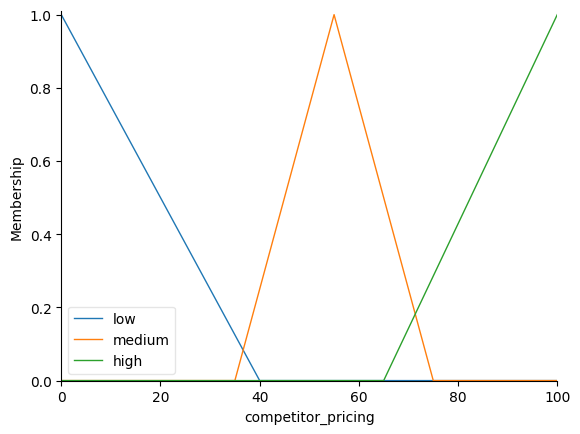

In [22]:
competitor_pricing.view()

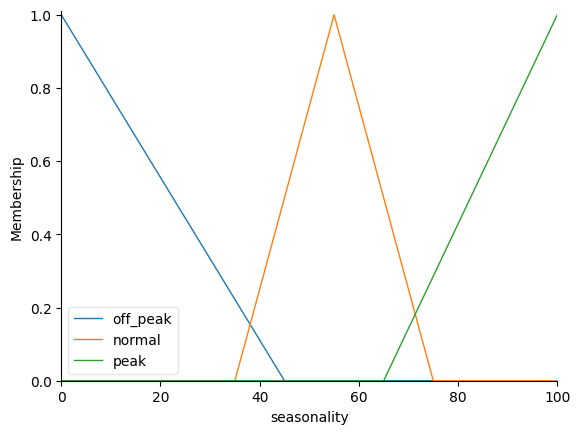

In [ ]:
seasonality.view()

In [23]:

rule1 = ctrl.Rule(demand_level['high'] & competitor_pricing['high'] & stock_level['low'], price_truonghuy['very_high'])
rule2 = ctrl.Rule(demand_level['high'] & seasonality['peak'] & stock_level['low'], price_truonghuy['very_high'])
rule3 = ctrl.Rule(demand_level['medium'] & production_cost['high'] & stock_level['low'], price_truonghuy['very_high'])

rule4 = ctrl.Rule(demand_level['high'] & competitor_pricing['medium'] & stock_level['medium'], price_truonghuy['high'])
rule5 = ctrl.Rule(demand_level['medium'] & competitor_pricing['high'] & stock_level['low'], price_truonghuy['high'])
rule6 = ctrl.Rule(demand_level['high'] & seasonality['peak'] & stock_level['medium'], price_truonghuy['high'])

rule7 = ctrl.Rule(demand_level['medium'] & competitor_pricing['medium'] & stock_level['medium'], price_truonghuy['medium'])
rule8 = ctrl.Rule(demand_level['low'] & competitor_pricing['high'] & stock_level['medium'], price_truonghuy['medium'])
rule9 = ctrl.Rule(demand_level['medium'] & production_cost['medium'] & stock_level['medium'], price_truonghuy['medium'])

rule10 = ctrl.Rule(demand_level['low'] & competitor_pricing['low'] & stock_level['high'], price_truonghuy['low'])
rule11 = ctrl.Rule(demand_level['medium'] & production_cost['low'] & stock_level['high'], price_truonghuy['low'])
rule12 = ctrl.Rule(demand_level['low'] & seasonality['off_peak'] & stock_level['high'], price_truonghuy['low'])

rule13 = ctrl.Rule(demand_level['low'] & competitor_pricing['low'] & stock_level['high'], price_truonghuy['very_low'])
rule14 = ctrl.Rule(demand_level['low'] & seasonality['off_peak'] & stock_level['high'], price_truonghuy['very_low'])
rule15 = ctrl.Rule(demand_level['medium'] & competitor_pricing['low'] & stock_level['high'], price_truonghuy['very_low'])



In [24]:
pricing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
                                   rule10, rule11, rule12, rule13, rule14, rule15])
pricing = ctrl.ControlSystemSimulation(pricing_ctrl)

pricing.input['demand_level'] = 70
pricing.input['competitor_pricing'] = 50
pricing.input['production_cost'] = 40
pricing.input['seasonality'] = 60
pricing.input['stock_level'] = 30

pricing.compute()
print(f"Power Level: {pricing.output['price_truonghuy']:.2f}%")

KeyError: 'price_truonghuy'